# Simulation study
## Learning Graph Structure Under Uncertain Interventions

### Import libraries

In [1]:
############################################
##      Requires: NumPy, SciPy, tqdm      ##
############################################
from mcmcdagtargets import MCMCDagTargets

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import multiprocessing as mp
from IPython.display import clear_output

### Run simulations

In [2]:
workers = mp.cpu_count()
sim_runs = workers * 6

start = 0
end = sim_runs
range_length = (end - start) / workers

subranges = [(start + i * range_length, start + (i + 1) * range_length) for i in range(workers)]

# Create ranges from the tuples
ranges = [range(int(start), int(end)) for start, end in subranges]

In [3]:
from simulation import simulate
with mp.Pool(processes = workers) as pool:
    results = pool.map(simulate, ranges)
    

#with open('sim_results.pkl', 'wb') as file:
#    pickle.dump(results, file)

Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 20 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 100 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 500 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...
Simulating for n_k = 2000 ...


In [5]:
with open('sim_results.pkl', 'rb') as file:
    sim_results = pickle.load(file)

In [9]:
tot_sim_results = {}
for d in sim_results:
    for key, value in d['shd'].items():
        if key in tot_sim_results:
            tot_sim_results[key] += value
        else:
            tot_sim_results[key] = value


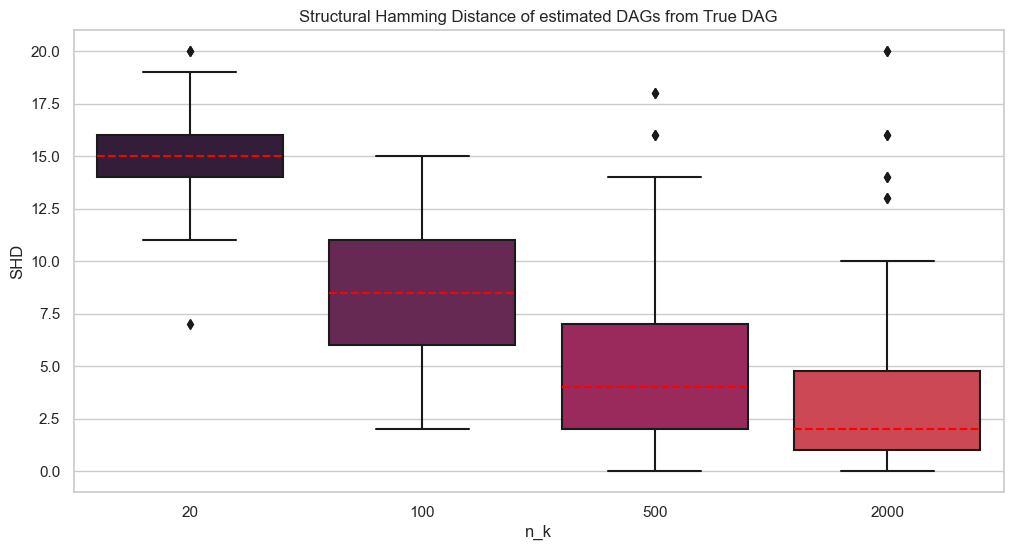

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))  

sns.set(style="whitegrid")
palette = sns.color_palette("rocket")
medianprops = {'color': 'red', 'linestyle': '--'}
sns.boxplot(data=pd.DataFrame(tot_sim_results), orient="v", palette=palette, ax=ax, medianprops=medianprops)

# Add customizations
plt.title("Structural Hamming Distance of estimated DAGs from True DAG")
plt.ylabel("SHD")
plt.xlabel('n_k')

# Display the plot
plt.show()